In [1]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
import dltools

In [2]:
# 定义了两个函数：风险函数f和经验风险函数g
def f(x):
    return x * torch.cos(np.pi * x)

def g(x):
    return f(x) + 0.2 * torch.cos(5 * np.pi * x)

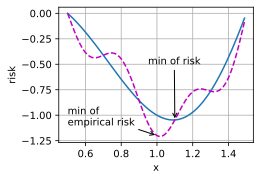

In [3]:
def annotate(text, xy, xytext): 
    dltools.plt.gca().annotate(text, xy=xy, xytext=xytext,arrowprops=dict(arrowstyle='->'))

x = torch.arange(0.5, 1.5, 0.01)
dltools.set_figsize((4.5, 2.5))
dltools.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))

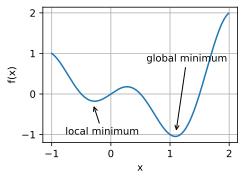

In [7]:
# 局部最小和全局最小
# f(x)=x⋅cos(πx) for −1.0≤x≤2.0,
x = torch.arange(-1.0, 2.0, 0.01)
dltools.plot(x, [f(x), ], 'x', 'f(x)')
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))

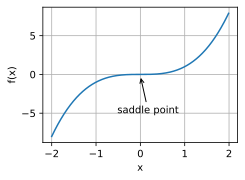

In [5]:
# 鞍点
x = torch.arange(-2.0, 2.0, 0.01)
dltools.plot(x, [x**3], 'x', 'f(x)')
annotate('saddle point', (0, -0.2), (-0.52, -5.0))

d:\app\miniconda3\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


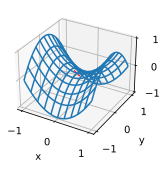

In [10]:
# 较高维度的鞍点
x, y = torch.meshgrid(torch.linspace(-1.0, 1.0, 101), torch.linspace(-1.0, 1.0, 101))
z = x**2 - y**2

ax = dltools.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
dltools.plt.xticks(ticks)
dltools.plt.yticks(ticks)
ax.set_zticks(ticks)
dltools.plt.xlabel('x')
dltools.plt.ylabel('y');

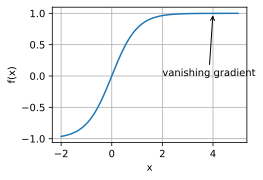

In [11]:
# 梯度消失
x = torch.arange(-2.0, 5.0, 0.01)
dltools.plot(x, [torch.tanh(x)], 'x', 'f(x)')
annotate('vanishing gradient', (4, 1), (2, 0.0))